In [59]:
import pandas as pd
import numpy as np
from numpy import arange
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

#### Let's read in the csv files generated off web scraped top 8 European soccer leagues.

In [2]:
Bundesliga = pd.read_csv("Bundesliga.csv")
EPL = pd.read_csv("EPL.csv")
Eredivisie = pd.read_csv("Eredivisie.csv")
LaLiga = pd.read_csv("LaLiga.csv")
Ligue1 = pd.read_csv("Ligue1.csv")
PLiga = pd.read_csv("PLiga.csv")
RPL = pd.read_csv("RPL.csv")
SerieA = pd.read_csv("SerieA.csv")

In [3]:
Bundesliga.head()

,RANK,TEAM,W,D,L,GF,GA,PTS,ATT,PL,AGE,POSS,SEASON,LEAGUE
0,17,Arminia,5,13,16,27,53,28,"16,773",26,25.8,40.5,2022,BUNDESLIGA
1,14,Augsburg,10,8,16,39,56,38,"15,197",26,26.6,41.2,2022,BUNDESLIGA
2,1,Bayern Munich,24,5,5,97,37,77,"33,176",30,26.8,64.8,2022,BUNDESLIGA
3,13,Bochum,12,6,16,38,52,42,"15,125",28,28.0,44.5,2022,BUNDESLIGA
4,2,Dortmund,22,3,9,85,52,69,"41,800",33,25.9,59.6,2022,BUNDESLIGA


In [4]:
SerieA.head()

,RANK,TEAM,W,D,L,GF,GA,PTS,ATT,PL,AGE,POSS,SEASON,LEAGUE
0,8,Atalanta,16,11,11,65,48,59,"10,447",32,27.5,55.1,2022,SERIE A
1,13,Bologna,12,10,16,44,55,46,"14,158",36,26.6,50.7,2022,SERIE A
2,18,Cagliari,6,12,20,34,68,30,"9,718",33,26.5,44.4,2022,SERIE A
3,14,Empoli,10,11,17,50,70,41,"6,356",28,24.5,47.1,2022,SERIE A
4,7,Fiorentina,19,5,14,59,51,62,"21,107",28,26.4,58.2,2022,SERIE A


In [5]:
EPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RANK    138 non-null    int64  
 1   TEAM    138 non-null    object 
 2   W       138 non-null    int64  
 3   D       138 non-null    int64  
 4   L       138 non-null    int64  
 5   GF      138 non-null    int64  
 6   GA      138 non-null    int64  
 7   PTS     138 non-null    int64  
 8   ATT     138 non-null    object 
 9   PL      138 non-null    int64  
 10  AGE     138 non-null    float64
 11  POSS    138 non-null    float64
 12  SEASON  138 non-null    int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 14.1+ KB


In [6]:
UEFA_Leagues = pd.concat([Bundesliga, EPL, Eredivisie, LaLiga, Ligue1, PLiga, RPL, SerieA],\
                         ignore_index= True)

In [7]:
UEFA_Leagues.head()

,RANK,TEAM,W,D,L,GF,GA,PTS,ATT,PL,AGE,POSS,SEASON,LEAGUE
0,17,Arminia,5,13,16,27,53,28,"16,773",26,25.8,40.5,2022,BUNDESLIGA
1,14,Augsburg,10,8,16,39,56,38,"15,197",26,26.6,41.2,2022,BUNDESLIGA
2,1,Bayern Munich,24,5,5,97,37,77,"33,176",30,26.8,64.8,2022,BUNDESLIGA
3,13,Bochum,12,6,16,38,52,42,"15,125",28,28.0,44.5,2022,BUNDESLIGA
4,2,Dortmund,22,3,9,85,52,69,"41,800",33,25.9,59.6,2022,BUNDESLIGA


In [8]:
UEFA_Leagues.tail()

,RANK,TEAM,W,D,L,GF,GA,PTS,ATT,PL,AGE,POSS,SEASON,LEAGUE
1080,2,Roma,19,13,6,54,31,70,"40,135",32,28.0,57.3,2015,SERIE A
1081,7,Sampdoria,13,17,8,48,42,56,"21,745",30,26.2,50.4,2015,SERIE A
1082,12,Sassuolo,12,13,13,49,57,49,"12,831",27,27.0,47.0,2015,SERIE A
1083,9,Torino,14,12,12,48,45,54,"16,689",31,28.1,49.2,2015,SERIE A
1084,16,Udinese,10,11,17,43,56,41,"8,912",28,26.9,46.5,2015,SERIE A


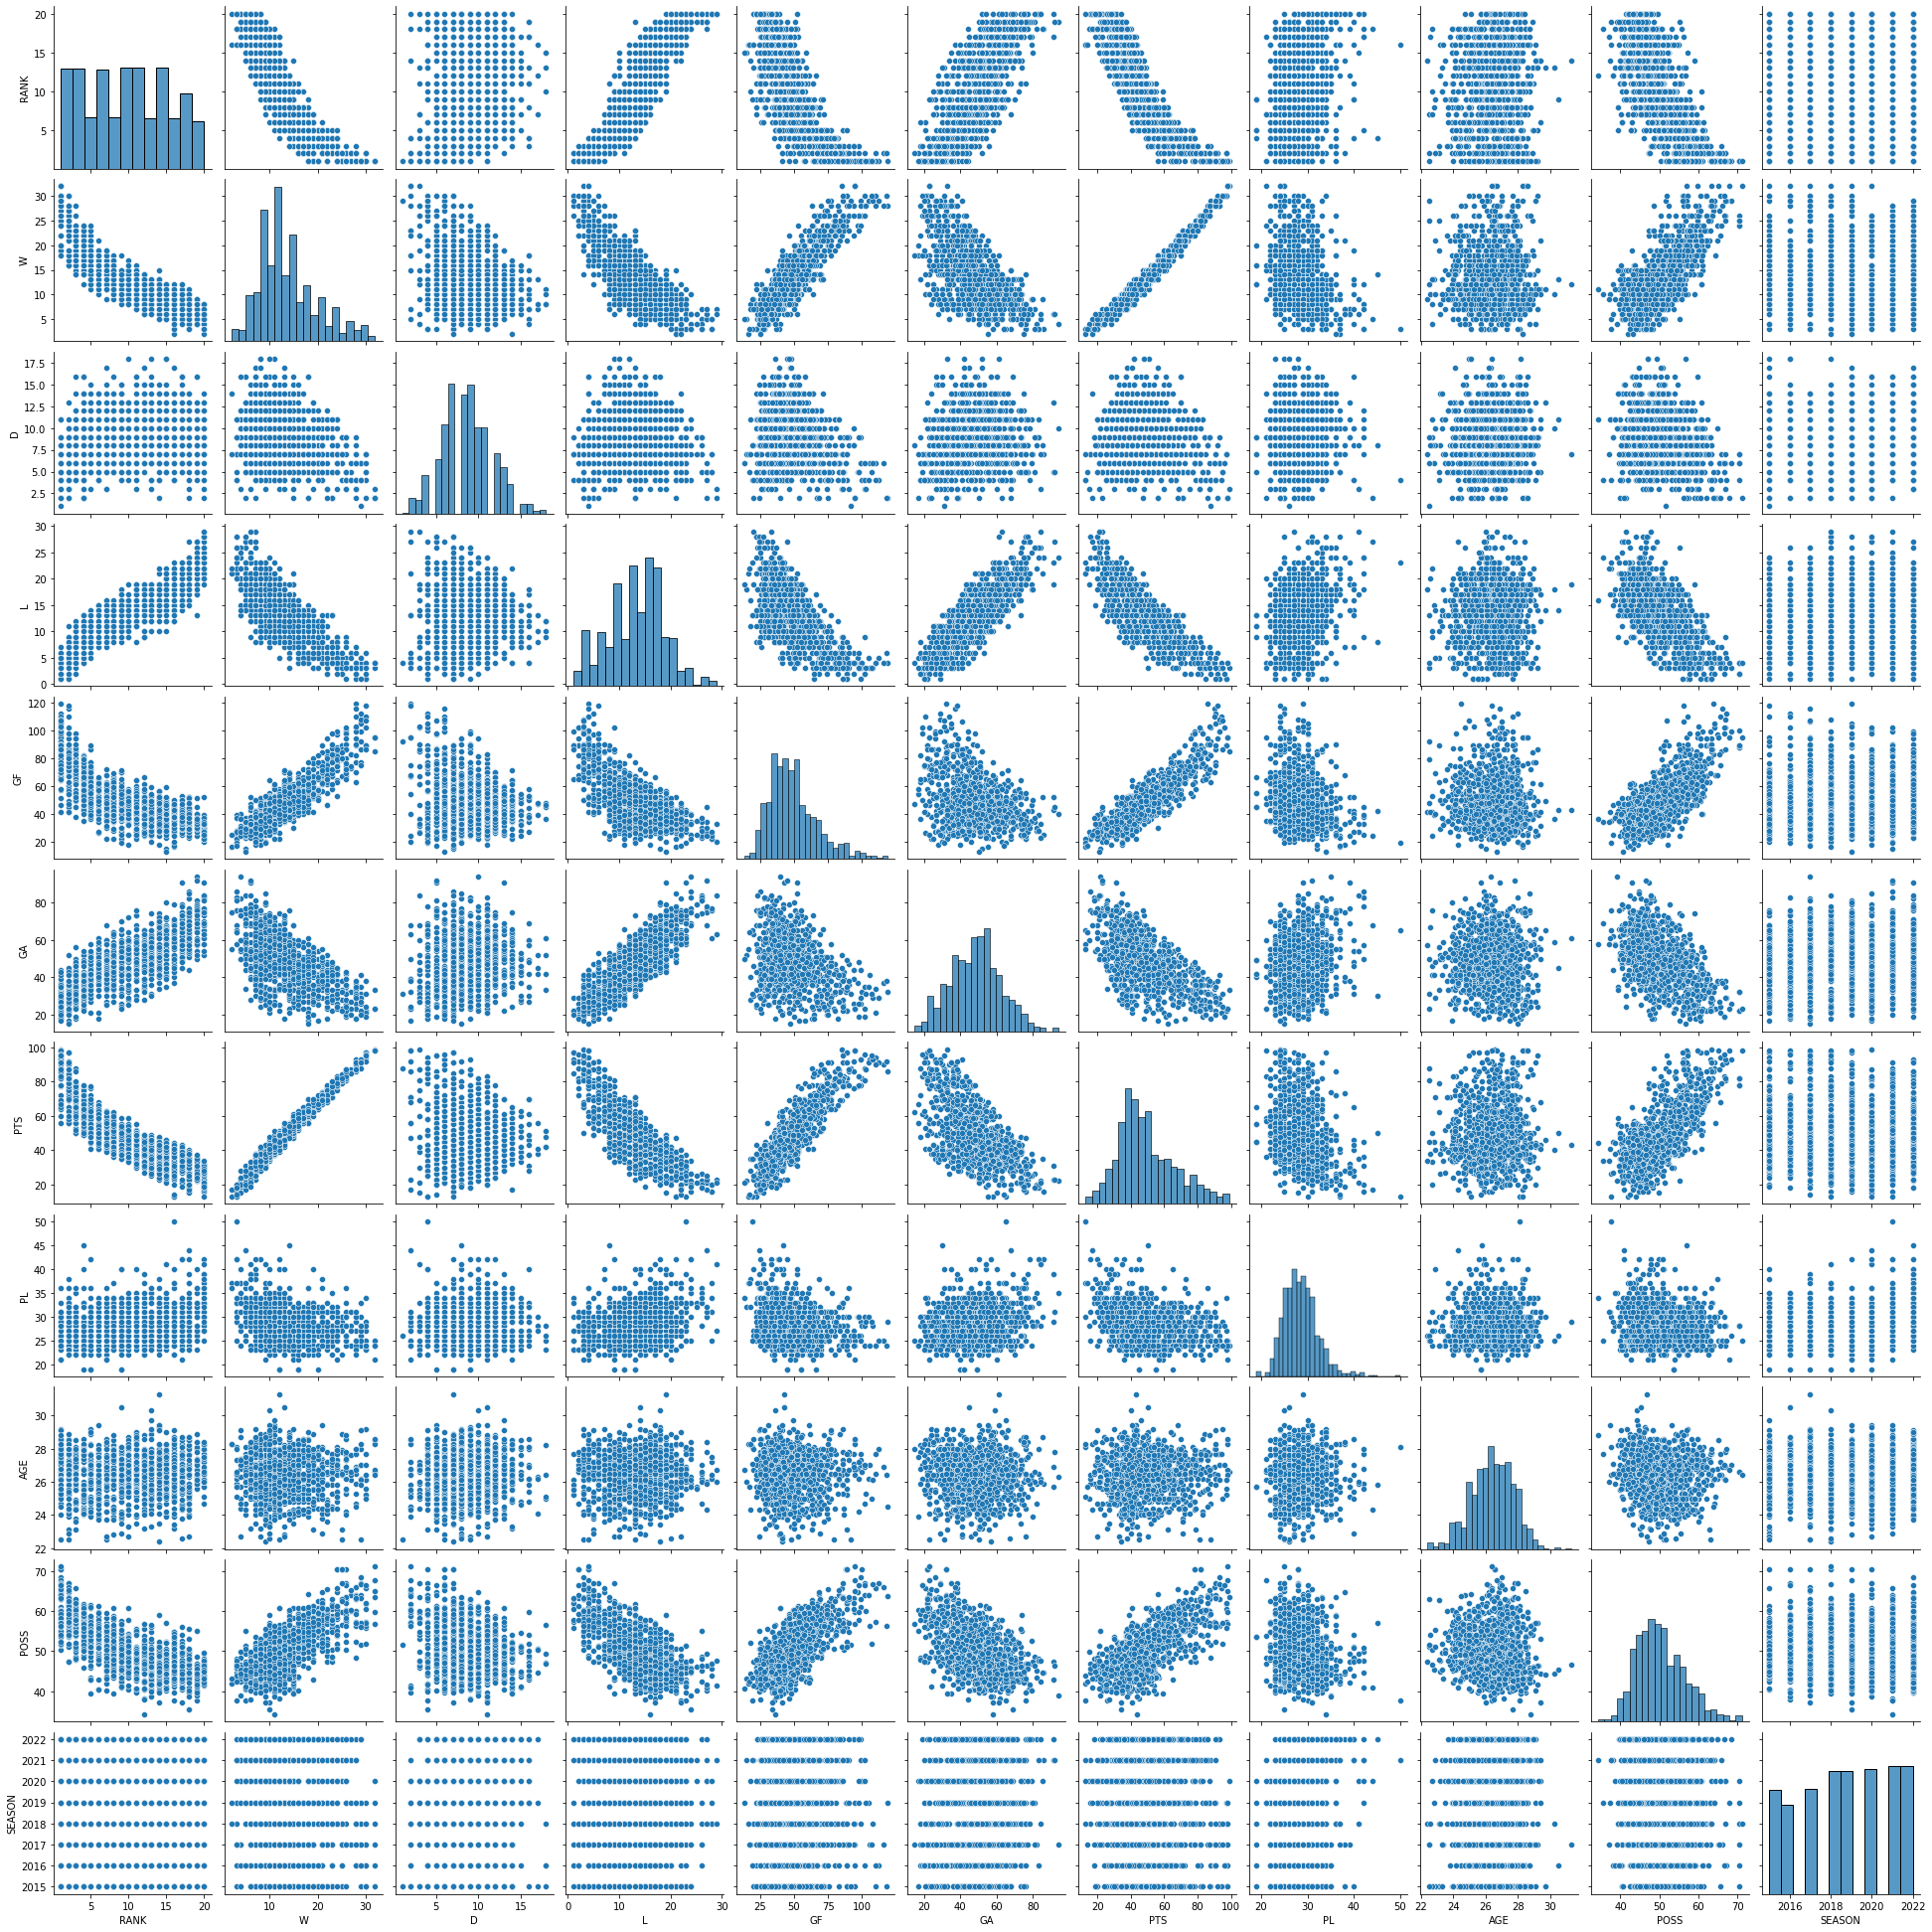

In [9]:
sns.pairplot(UEFA_Leagues);

#### As seen prior to the baseline modeling; DRAW (D), SQUAD SIZE (PL), SQUAD AGE (AGE) data does not appear to be correlated with POSSESSION RATIO (POSS). We will leave those columns out of the data to be analyzed for Linear Regression.

In [35]:
X, X_test, y, y_test = train_test_split(UEFA_Leagues[['RANK','W','L','GF','GA','PTS']],\
                                                    UEFA_Leagues['POSS'], test_size=0.20,\
                                                    random_state=42)

In [36]:
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

#### All UEFA_Leagues data is randomly split into 60% train, 20% validation and 20% test data sets. Let's start modeling using 60% train data.

In [37]:
w = X_tr
w = sm.add_constant(w)
z = y_tr
model = sm.OLS(z,w)
UEFA_Leagues_train_model = model.fit()
UEFA_Leagues_train_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   POSS   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     136.5
Date:                Fri, 17 Jun 2022   Prob (F-statistic):          2.81e-111
Time:                        11:08:51   Log-Likelihood:                -1821.9
No. Observations:                 651   AIC:                             3658.
Df Residuals:                     644   BIC:                             3689.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.7697      1.731     29.338      0.000      47.372      54.168
RANK          -0.1206      0.088     -1.364      0.173      -0.294       0.053
W              0.4175      0.203      2.055      0.040       0.019       0.816
L             -0.1368      0.104     -1.319      0.188      -0.340       0.067
GF             0.1777      0.026      6.861      0.000       0.127       0.229
GA            -0.0787      0.027     -2.901      0.004      -0.132      -0.025
PTS           -0.1681      0.068     -2.477      0.014      -0.301      -0.035
==============================================================================
Omnibus:                        2.264   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.340
Skew:                          -0.136   Prob(JB):                        0.310
Kurtosis:                       2.891   Cond. No.                         985.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

####  COND NO value is below 1,000 to start with. Let's see which feature(s) might be causing multicollinearity if any.

In [38]:
variables = model.exog

vif = [variance_inflation_factor(variables,i)for i in range(variables.shape[1])]

vif

[122.14540501041759,
 9.281403388694258,
 59.4915451359976,
 12.551717477220071,
 8.374100735242246,
 5.695708198073744,
 54.18350141867555]

#### As seen in baseline modeling, WIN (W) and POINTS (PTS) data show strong multicollinearity. However, with the increase of our data set size, p-values are now much lower. Let's drop WIN data first and see what happens.

In [39]:
w = X_tr[['RANK','L','GF','GA','PTS']]
w = sm.add_constant(w)
z = y_tr
model = sm.OLS(z,w)
UEFA_Leagues_train_model = model.fit()
UEFA_Leagues_train_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   POSS   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     162.2
Date:                Fri, 17 Jun 2022   Prob (F-statistic):          1.70e-111
Time:                        11:09:21   Log-Likelihood:                -1824.0
No. Observations:                 651   AIC:                             3660.
Df Residuals:                     645   BIC:                             3687.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.4576      1.612     30.672      0.000      46.291      52.624
RANK          -0.2006      0.080     -2.521      0.012      -0.357      -0.044
L             -0.0135      0.085     -0.159      0.874      -0.180       0.153
GF             0.1980      0.024      8.249      0.000       0.151       0.245
GA            -0.1001      0.025     -3.981      0.000      -0.149      -0.051
PTS           -0.0433      0.030     -1.425      0.155      -0.103       0.016
==============================================================================
Omnibus:                        2.132   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.344   Jarque-Bera (JB):                2.199
Skew:                          -0.134   Prob(JB):                        0.333
Kurtosis:                       2.906   Cond. No.                         903.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Let's check our vif values once more.

In [40]:
variables = model.exog

vif = [variance_inflation_factor(variables,i)for i in range(variables.shape[1])]

vif

[105.51878772913936,
 7.480318561940468,
 8.345848111126699,
 7.156078388740745,
 4.8614438059106515,
 10.783502770404533]

#### All of VIF values are still greater than 5 except one. Let's drop the POINTS (PTS) column which has the highest VIF value.

In [41]:
w = X_tr[['RANK','L','GF','GA']]
w = sm.add_constant(w)
z = y_tr
model = sm.OLS(z,w)
UEFA_Leagues_train_model = model.fit()
UEFA_Leagues_train_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   POSS   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     201.9
Date:                Fri, 17 Jun 2022   Prob (F-statistic):          3.09e-112
Time:                        11:10:01   Log-Likelihood:                -1825.0
No. Observations:                 651   AIC:                             3660.
Df Residuals:                     646   BIC:                             3682.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.7350      1.068     44.686      0.000      45.637      49.833
RANK          -0.1613      0.075     -2.160      0.031      -0.308      -0.015
L             -0.0155      0.085     -0.183      0.855      -0.182       0.151
GF             0.1720      0.016     11.012      0.000       0.141       0.203
GA            -0.0896      0.024     -3.724      0.000      -0.137      -0.042
==============================================================================
Omnibus:                        2.594   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.667
Skew:                          -0.148   Prob(JB):                        0.264
Kurtosis:                       2.895   Cond. No.                         490.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### COND NO significantly reduced however LOSS (L) variable continues to have a high p-value. Let's check how the VIF values are after PTS column is dropped.

In [42]:
variables = model.exog

vif = [variance_inflation_factor(variables,i)for i in range(variables.shape[1])]

vif

[46.237619396860765,
 6.583977979026553,
 8.343421796842291,
 3.025575734660423,
 4.443939824724583]

#### Two of our variables now have VIF values less than 5! LOSS (L) variable though continues to have the high p-value and the highest VIF value of concern. Let's drop LOSS (L).

In [43]:
x_train_out= X_tr[['RANK','GF','GA']]
x_train_out = sm.add_constant(x_train_out)
y_train_out= y_tr
model_train_out = sm.OLS(y_train_out,x_train_out)
UEFA_Leagues_train_out_model = model_train_out.fit()
UEFA_Leagues_train_out_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   POSS   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     269.6
Date:                Fri, 17 Jun 2022   Prob (F-statistic):          1.76e-113
Time:                        11:10:27   Log-Likelihood:                -1825.1
No. Observations:                 651   AIC:                             3658.
Df Residuals:                     647   BIC:                             3676.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.6669      1.001     47.643      0.000      45.702      49.632
RANK          -0.1676      0.066     -2.521      0.012      -0.298      -0.037
GF             0.1730      0.014     11.968      0.000       0.145       0.201
GA            -0.0923      0.019     -4.825      0.000      -0.130      -0.055
==============================================================================
Omnibus:                        2.610   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.271   Jarque-Bera (JB):                2.684
Skew:                          -0.148   Prob(JB):                        0.261
Kurtosis:                       2.892   Cond. No.                         451.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### All the p-values are now below 0.05! Let's check VIF values one last time.

In [44]:
variables = model_train_out.exog

vif = [variance_inflation_factor(variables,i)for i in range(variables.shape[1])]

vif

[40.62059559974034, 5.219044249704403, 2.5972876160454286, 2.812299395998419]

#### RANK has a VIF slightly over 5 however we will keep it as RANK will play a key role establishing a team's success and communicating this level of success to the client.

#### Let's check some visuals to see if residuals are distributed normally.

/home/dyedbird/anaconda3/envs/classification/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


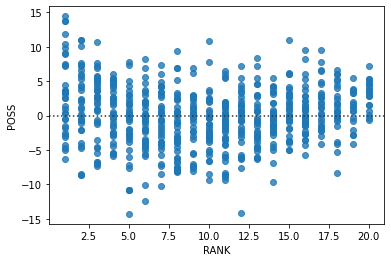

In [45]:
sns.residplot(X_tr.RANK,y_tr, data = UEFA_Leagues);

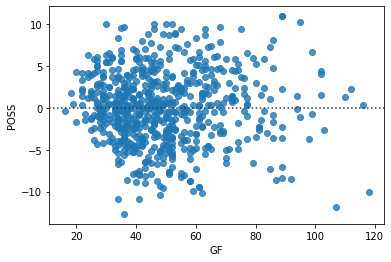

In [46]:
sns.residplot(X_tr.GF,y_tr, data = UEFA_Leagues);

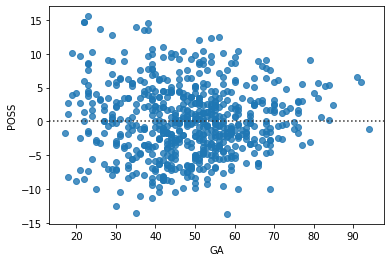

In [47]:
sns.residplot(X_tr.GA,y_tr, data = UEFA_Leagues);

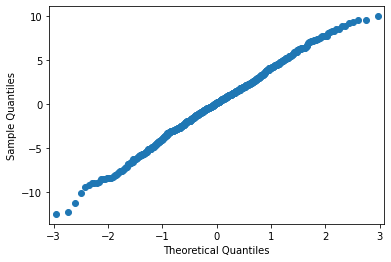

In [48]:
data = sm.datasets.longley.load()
model = sm.OLS(y_train_out, x_train_out)
fit  = model.fit()
res = fit.resid # residuals
fig = sm.qqplot(res)
plt.show()

#### QQ plot shows that are residuals are normally distributed. Now, let's fit regression lines to our variables:

/home/dyedbird/anaconda3/envs/classification/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


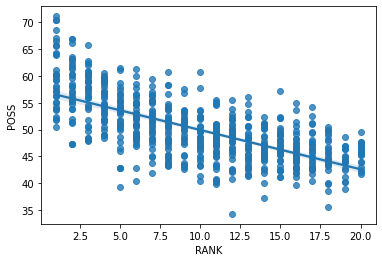

In [49]:
sns.regplot(X_tr.RANK,y_tr, robust = True);

/home/dyedbird/anaconda3/envs/classification/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


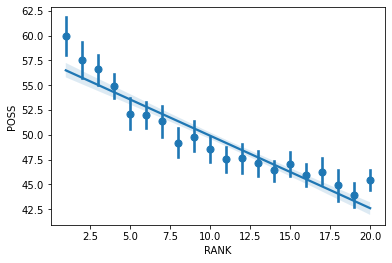

In [50]:
sns.regplot(X_tr.RANK,y_tr, x_estimator=np.mean, robust = True);

/home/dyedbird/anaconda3/envs/classification/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


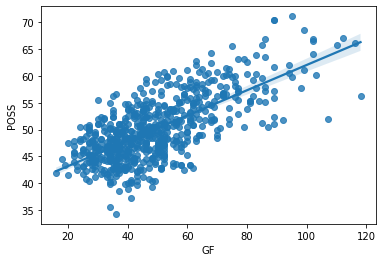

In [29]:
sns.regplot(X_tr.GF,y_tr, data = UEFA_Leagues);

/home/dyedbird/anaconda3/envs/classification/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


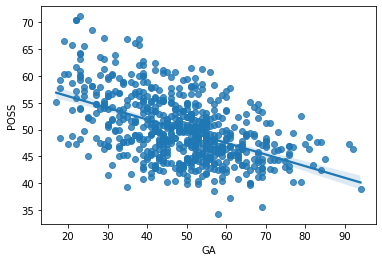

In [51]:
sns.regplot(X_tr.GA,y_tr, data = UEFA_Leagues);

#### Let's score our validation set using the model:

In [52]:
x_val_out = X_val[['RANK','GF','GA']]
x_val_out = sm.add_constant(x_val_out)
y_val_out = y_val
model_val_out = sm.OLS(y_val_out,x_val_out)
UEFA_Leagues_val_out_model = model_val_out.fit()
UEFA_Leagues_val_out_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   POSS   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     110.1
Date:                Fri, 17 Jun 2022   Prob (F-statistic):           4.53e-43
Time:                        11:13:02   Log-Likelihood:                -620.51
No. Observations:                 217   AIC:                             1249.
Df Residuals:                     213   BIC:                             1263.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2319      1.888     24.487      0.000      42.510      49.954
RANK          -0.0893      0.119     -0.751      0.453      -0.324       0.145
GF             0.2114      0.024      8.673      0.000       0.163       0.259
GA            -0.1143      0.036     -3.178      0.002      -0.185      -0.043
==============================================================================
Omnibus:                        0.260   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.878   Jarque-Bera (JB):                0.412
Skew:                          -0.011   Prob(JB):                        0.814
Kurtosis:                       2.788   Cond. No.                         468.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/home/dyedbird/anaconda3/envs/metis/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


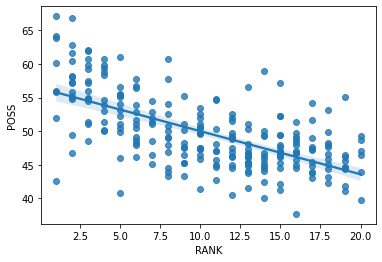

In [29]:
sns.regplot(X_val.RANK,y_val, robust = True);

#### SInce validation R^2 score is higher than training data R^2 score (underfit), we will run cross validation to avoid any unfortunate data splitting with our sm model. (in a previous attempt with slightly smaller dataset, we have shown that outliers were not the cause of underfitting)

In [56]:
lm = LinearRegression()
kf = KFold(n_splits=3,shuffle=True,random_state = 42)
lm_cv = cross_val_score(lm, X, y, cv= kf,scoring='r2')
print('Simple regression scores: ', lm_cv)
print('Simple mean cv r^2: ', np.round(np.mean(lm_cv), 3), "+-", np.round(np.std(lm_cv),3))
mean_r2 = np.mean(lm_cv)
std_r2 = np.std(lm_cv)

Simple regression scores:  [0.57790978 0.57281636 0.55435001]
Simple mean cv r^2:  0.568 +- 0.01


#### With skLearn Linear Regression, we are able to validate our model at R^2 = 0.568. Our next try will be running a Lasso Regression since we have already established high multicollinearity among the features.

In [75]:
las_reg = LassoCV(alphas=arange(0.01,1,0.01), cv = kf, n_jobs=-1, max_iter = 10000) #define Lasso Reg model

In [76]:
las_model = las_reg.fit(X, y) # fit model

In [77]:
print(las_model.alpha_) #alpha that produced the lowest MSE

0.01


In [79]:
las_model.score(X,y)

0.5746556907371898

#### So far Simple Linear Regresssion w/Stats Models have produced the highest validation data score at 0.608. So let's score our test data using Stats Models.

In [80]:
x_test_out = X_test[['RANK','GF','GA']]
x_test_out = sm.add_constant(x_test_out)
y_test_out = y_test
model_test_out = sm.OLS(y_test_out,x_test_out)
UEFA_Leagues_test_out_model = model_test_out.fit()
UEFA_Leagues_test_out_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   POSS   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     105.5
Date:                Fri, 17 Jun 2022   Prob (F-statistic):           7.07e-42
Time:                        12:46:23   Log-Likelihood:                -600.52
No. Observations:                 217   AIC:                             1209.
Df Residuals:                     213   BIC:                             1223.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.4193      1.703     28.427      0.000      45.062      51.777
RANK          -0.1597      0.111     -1.443      0.150      -0.378       0.058
GF             0.1801      0.025      7.227      0.000       0.131       0.229
GA            -0.1067      0.031     -3.486      0.001      -0.167      -0.046
==============================================================================
Omnibus:                        2.509   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.285   Jarque-Bera (JB):                2.553
Skew:                           0.015   Prob(JB):                        0.279
Kurtosis:                       3.531   Cond. No.                         456.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Out of curiousity, let's see how Lasso will score on test data...

In [81]:
las_model.score(X_test,y_test)

0.6008427832346662

#### Our Stats Model tuning is also validated using test data, Lasso scored 0.003 higher than SM. Let's produce some visuals...

/home/dyedbird/anaconda3/envs/classification/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


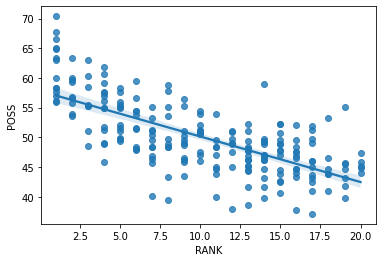

In [83]:
sns.regplot(X_test['RANK'],y_test, robust = True);

In [88]:
hoarders = UEFA_Leagues[UEFA_Leagues['POSS']>69]
hoarders

,RANK,TEAM,W,D,L,GF,GA,PTS,ATT,PL,AGE,POSS,SEASON,LEAGUE
37,1,Bayern Munich,26,4,4,100,32,82,"57,353",28,26.6,70.4,2020,BUNDESLIGA
52,1,Bayern Munich,24,6,4,88,32,78,"75,000",28,26.6,70.4,2019,BUNDESLIGA
67,1,Bayern Munich,24,6,4,88,32,78,"75,000",28,26.6,70.4,2018,BUNDESLIGA
82,1,Bayern Munich,25,7,2,89,22,82,"75,000",28,26.6,70.4,2017,BUNDESLIGA
97,1,Bayern Munich,25,7,2,89,22,82,"75,000",28,26.6,70.4,2016,BUNDESLIGA
112,1,Bayern Munich,25,7,2,89,22,82,"75,000",28,26.6,70.4,2015,BUNDESLIGA
216,1,Manchester City,32,2,4,95,23,98,"54,130",25,26.4,71.1,2018,NaN


In [92]:
super_efficients = UEFA_Leagues[(UEFA_Leagues['POSS']<55) & (UEFA_Leagues['RANK']==1)]
super_efficients

,RANK,TEAM,W,D,L,GF,GA,PTS,ATT,PL,AGE,POSS,SEASON,LEAGUE
345,1,PSV Eindhoven,26,5,3,87,39,83,"33,289",26,24.0,50.4,2018,EREDIVISIE
384,1,PSV Eindhoven,29,1,4,92,31,88,"32,529",26,22.5,51.7,2015,EREDIVISIE
412,1,Atlético Madrid,26,8,4,67,25,86,NaN,25,27.3,52.4,2021,LA LIGA
572,1,Lille,24,11,3,64,23,83,209,21,25.4,53.9,2021,LIGUE 1
658,1,Monaco,30,5,3,107,31,95,"9,586",29,25.0,51.9,2017,LIGUE 1
860,1,Zenit,20,4,6,57,29,64,"48,122",31,28.1,54.9,2019,RPL
868,1,Loko Moscow,18,6,6,41,21,60,"12,708",24,28.5,53.6,2018,RPL
935,1,Milan,26,8,4,69,31,86,"44,015",28,25.6,54.2,2022,SERIE A
953,1,Inter,28,7,3,89,35,91,158,25,27.7,52.4,2021,SERIE A
